Recreation of the Pelargonium2.0.R script I wrote at LMU.

This script:

1) Calculated free acid (FA) of various Pelargonium plants in order to assess the strength of the CAM response under a variety of different climatic conditions.

2) Separated FA by morning and evening results.

3) Calculated the absolute difference between morning and night FA for each sample

4) Calculated the relative difference between morning and night FA for each sample

5) Filtered Pelargonium results by species and plotted a graph for each listing the FA (morning/night), the absolute and percentage difference for these samples (accounting for different timepoints) and was wrote in a way that any new data added to the Pelargonium.csv would automatically produce another graph without needing to edit the script further.

Packages used (R): Tidyverse 

In [67]:
#Importing packages for analysis
import pandas as pd #pandas is a Python library (py terminology for package) whihc can help with data analysis, cleaning, manipulating and exploration
import matplotlib.pyplot as plt #matplotlib is a library for creating various visualisations
import seaborn as sns #assists in the creation of attractive and informative statistical graphs
import os #provides functions for interacting with the operating system

In [68]:
#Setting the working directory
os.chdir("/home/joe/Desktop/Coding/Python/Thibaud_Project")
os.getcwd() #check if wd properly set, note this doesn't output within this jupyter cell for some reason


'/home/joe/Desktop/Coding/Python/Thibaud_Project'

In [69]:
#Load in the Pelargonium data set 
pelargonium = pd.read_csv("TitrationPelargonium.csv")  #read the csv
print(pelargonium.info()) #viewing the variables and data within our .csv, remove ".info()" to view data in its entirety 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   probe              65 non-null     object 
 1   time_of_day        65 non-null     object 
 2   initial_condition  65 non-null     object 
 3   treatment          65 non-null     object 
 4   species            65 non-null     object 
 5   species_treatment  65 non-null     object 
 6   timepoint          65 non-null     int64  
 7   FW                 65 non-null     float64
 8   VNaOH              65 non-null     int64  
 9   replicate          65 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 5.2+ KB
None


Now we set our working directory and imported our Pelargonium data, it is time to do some calculations to find the FA for each sample.

Notes:
Probe = Sample name
Time of day = Morning or evening (10am/pm collection)
Initial condition = Climate condition at timepoint 0
Treatment = Treatment condition (control = no change)
Species = Name of species
Species_treatment = Name of species, including treatment information
Timepoint = Week of study
FW = Fresh weight of sample (cuttings of leaf or stem)
VNaOH = Volume of Sodium Hydroxide required to balance titration
Replicate = Identifier of sample batch 

What we need however, is to calculate Free Acidity (FA). The formulas for these calculations was given to me by a member of LMU. 

I did this in R with the following command:

Pelargonium$FA <- ((0.00001*Pelargonium$VNaOH/1000)*3.5)/(Pelargonium$FW/1000)*1000000
pelargonium["FA"] = ((0.00001 * pelargonium["VNaOH"] / 1000) * 3.5) / (pelargonium["FW"] / 1000) * 1000000

Is reasonably similar and achieves the same result in python, using ["FA"] in place of pelargonium$FA for exampe

In [70]:
#Free acid calculation
pelargonium["FA"] = ((0.00001 * pelargonium["VNaOH"] / 1000) * 3.5) / (pelargonium["FW"] / 1000) * 1000000
print(pelargonium.info()) #check if 'FA' column successfully added to the code


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   probe              65 non-null     object 
 1   time_of_day        65 non-null     object 
 2   initial_condition  65 non-null     object 
 3   treatment          65 non-null     object 
 4   species            65 non-null     object 
 5   species_treatment  65 non-null     object 
 6   timepoint          65 non-null     int64  
 7   FW                 65 non-null     float64
 8   VNaOH              65 non-null     int64  
 9   replicate          65 non-null     object 
 10  FA                 65 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.7+ KB
None


Now the next step is to:

1) Calculate the average FA for each probe, species, treatment, timepoint and time of day combination.

2) Create a new dataframe for calculations, with distinct data averages for morning and evening average FA.

I think the code I wrote to do this in R is perhaps inefficient, although it worked nonetheless.

Also note, removal of the "time_of_day" variable was done to enable the merging of the FA_morning and FA_evening datasets, allowing direct relative calculations. 

In [71]:
# 1 Calculate average_FA for specified variables as a new dataframe
pelargonium_average_FA = pelargonium.groupby(["timepoint", "species", "species_treatment", "time_of_day", "probe"])["FA"].mean().reset_index()
pelargonium_average_FA.rename(columns={"FA": "average_FA"}, inplace=True)
print(pelargonium_average_FA) #check whether average FA calculation successfully added 

    timepoint                        species  \
0           0      Pelargonium caucalifolium   
1           0      Pelargonium caucalifolium   
2           0     Pelargonium quinquelobatum   
3           0     Pelargonium quinquelobatum   
4           0      Pelargonium transvaalense   
5           0      Pelargonium transvaalense   
6           1  Pelargonium tetragonum (leaf)   
7           1  Pelargonium tetragonum (leaf)   
8           1  Pelargonium tetragonum (stem)   
9           1  Pelargonium tetragonum (stem)   
10          2  Pelargonium tetragonum (leaf)   
11          2  Pelargonium tetragonum (leaf)   
12          2  Pelargonium tetragonum (stem)   
13          2  Pelargonium tetragonum (stem)   
14          3  Pelargonium tetragonum (leaf)   
15          3  Pelargonium tetragonum (leaf)   
16          3  Pelargonium tetragonum (stem)   
17          3  Pelargonium tetragonum (stem)   
18          4  Pelargonium tetragonum (leaf)   
19          4  Pelargonium tetragonum (l

In [72]:
# 2 Split dataframe by morning and evening, renaming average_FA accordingly 

pelargonium_average_FA_evening = pelargonium_average_FA[pelargonium_average_FA["time_of_day"] == "evening"].copy() #this creates a new dataframe which is identical to pelargonium_average_FA but filtered to only include time of day = evening #.copy creates a new df  
pelargonium_average_FA_evening.rename(columns={"average_FA": "average_evening_FA"}, inplace=True) #rename for accuracy, and also so we can repeat calculation on morning (then rename it appropiately)
pelargonium_average_FA_evening.drop("time_of_day", axis=1, inplace=True) #the dataframe.drop command removes a column... axis = 1 means remove the column, but we can use axis = 0 to remove a row... inplace=TRUE means replace the dataframe
print(pelargonium_average_FA_evening.info())

pelargonium_average_FA_morning = pelargonium_average_FA[pelargonium_average_FA["time_of_day"] == "morning"].copy()
pelargonium_average_FA_morning.rename(columns={"average_FA": "average_morning_FA"}, inplace =True)
pelargonium_average_FA_morning.drop("time_of_day", axis=1, inplace=True)
print(pelargonium_average_FA_morning.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 20
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timepoint           11 non-null     int64  
 1   species             11 non-null     object 
 2   species_treatment   11 non-null     object 
 3   probe               11 non-null     object 
 4   average_evening_FA  11 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 528.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 1 to 21
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timepoint           11 non-null     int64  
 1   species             11 non-null     object 
 2   species_treatment   11 non-null     object 
 3   probe               11 non-null     object 
 4   average_morning_FA  11 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory u

In [73]:
#Now merge the two datasets and calculate the 1) ABsolute difference in values, 2) Percentage(relative) difference in values
pelargonium_calculations = pd.merge(pelargonium_average_FA_evening, pelargonium_average_FA_morning, on=["timepoint", "species", "species_treatment", "probe"])
pelargonium_calculations["absolute_difference"] = pelargonium_calculations["average_morning_FA"] - pelargonium_calculations["average_evening_FA"]
pelargonium_calculations["percentage_difference"] = ((pelargonium_calculations["average_morning_FA"] - pelargonium_calculations["average_evening_FA"]) / pelargonium_calculations["average_evening_FA"]) * 100
print(pelargonium_calculations[["species","percentage_difference","absolute_difference"]]) #the double [[]] lets me choose which columns to list, note that this doesn't impact the data itself, values match R calcs


                          species  percentage_difference  absolute_difference
0       Pelargonium caucalifolium              12.558702            44.283485
1      Pelargonium quinquelobatum             -19.865320           -57.940516
2       Pelargonium transvaalense               7.680784            22.752321
3   Pelargonium tetragonum (leaf)              -3.551446           -15.348701
4   Pelargonium tetragonum (stem)              -4.918033           -12.068966
5   Pelargonium tetragonum (leaf)              58.968114           156.467739
6   Pelargonium tetragonum (stem)              63.433182           139.863377
7   Pelargonium tetragonum (leaf)             -16.899767           -66.864295
8   Pelargonium tetragonum (stem)              67.412350           115.295118
9   Pelargonium tetragonum (leaf)             -73.634477         -1311.555562
10  Pelargonium tetragonum (stem)              64.102860           111.830534


Now the calculations are completed, the next step is to visualise data. 

As I was constrained for time, and unfortunately didn't finish the full set of results for Pelargonium, I only analysed P. tetragonium for both leaf and stem samples. Hence, the next step is to:

1) Filter results to be specific to P. tetragonium (stem) and P. tetragonium (leaf) 
2) Plot a graph for both, including: 
    - X axis = timepoint
    - Y axis = average_fa
    - Plotted as column/bar chart
    - Coloured bar charts by time of day
    - A orange line to signal the absolute difference between morning/night samples
    - A black line to signal the relative percentage difference between morning and night samples.
    

In [74]:
#Filtering by P. tetragonium  leaf and stem 
pelargonium_tet_leaf_col = pelargonium_average_FA[pelargonium_average_FA["species"] == "Pelargonium tetragonum (leaf)"]
pelargonium_tet_leaf_point = pelargonium_calculations[pelargonium_calculations["species"] == "Pelargonium tetragonum (leaf)"]
print(pelargonium_tet_leaf_col.info())
print(pelargonium_tet_leaf_point.info())

pelargonium_tet_stem_col = pelargonium_average_FA[pelargonium_average_FA["species"] == "Pelargonium tetragonum (stem)"]
pelargonium_tet_stem_point = pelargonium_calculations[pelargonium_calculations["species"] == "Pelargonium tetragonum (stem)"]
print(pelargonium_tet_stem_col.info())
print(pelargonium_tet_stem_point.info())

#creating directories for these graphs 
os.makedirs("graphs", exist_ok=True) #create a new directory (within current working directory) called graphs, exist_ok=True removes an error if this already exists
os.makedirs("graphs/Pelargonium", exist_ok=True) #create a new directory within "graphs" called "Pelargonium"

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 6 to 19
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timepoint          8 non-null      int64  
 1   species            8 non-null      object 
 2   species_treatment  8 non-null      object 
 3   time_of_day        8 non-null      object 
 4   probe              8 non-null      object 
 5   average_FA         8 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 448.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 3 to 9
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timepoint              4 non-null      int64  
 1   species                4 non-null      object 
 2   species_treatment      4 non-null      object 
 3   probe                  4 non-null      object 
 4   average_evening_FA     4 non-null   

In [77]:
#Having error where the _point scatterplots are 1 timepoint too high, checking why this may be:
print(pelargonium_tet_leaf_col[["species","timepoint"]])
print(pelargonium_tet_leaf_point[["species","timepoint"]]) 
#...looks like it should be fine
print("pelargonium_tet_leaf_col data types:", pelargonium_tet_leaf_col["timepoint"].dtypes)
print("pelargonium_tet_leaf_point data types:", pelargonium_tet_leaf_point["timepoint"].dtypes)



                          species  timepoint
6   Pelargonium tetragonum (leaf)          1
7   Pelargonium tetragonum (leaf)          1
10  Pelargonium tetragonum (leaf)          2
11  Pelargonium tetragonum (leaf)          2
14  Pelargonium tetragonum (leaf)          3
15  Pelargonium tetragonum (leaf)          3
18  Pelargonium tetragonum (leaf)          4
19  Pelargonium tetragonum (leaf)          4
                         species  timepoint
3  Pelargonium tetragonum (leaf)          1
5  Pelargonium tetragonum (leaf)          2
7  Pelargonium tetragonum (leaf)          3
9  Pelargonium tetragonum (leaf)          4
pelargonium_tet_leaf_col data types: int64
pelargonium_tet_leaf_point data types: int64


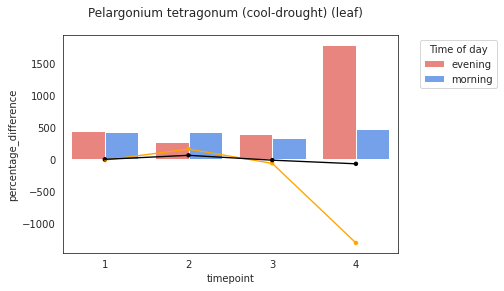

In [84]:
#P. tetragonium (leaf) graph. plt = matplotlib, sns = seaborn packages
plt.figure() 
colors = {"morning": "#619CFF", "evening":  "#F8766D"}
sns.barplot(data=pelargonium_tet_leaf_col, x="timepoint", y="average_FA", hue="time_of_day",palette = colors) #for barplots
sns.pointplot(data=pelargonium_tet_leaf_point, x="timepoint", y="absolute_difference", color="orange", scale=0.5)
sns.pointplot(data=pelargonium_tet_leaf_point, x="timepoint", y="percentage_difference", color="black", scale=0.5)
plt.legend(title="Time of day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle(pelargonium_tet_leaf_col['species_treatment'].unique()[0]) 
plt.savefig("graphs/Pelargonium/Pelargonium_Tetragonum_leaf.png", bbox_inches='tight', facecolor='white') #face color specifies background color

#I was trying this graph with sns.scatterplot at first, but was adding an plotting 1 too high on timepoint (i.e. 2,3,4,5) despite it not existing
#Scatterplot works numerical x numerical, while pointplot works categorical x numerical, so perhaps that's why it worked better? 


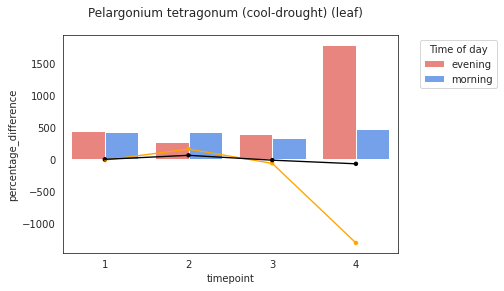

In [86]:
plt.figure() 
colors = {"morning": "#619CFF", "evening":  "#F8766D"}
sns.barplot(data=pelargonium_tet_leaf_col, x="timepoint", y="average_FA", hue="time_of_day", palette = colors) #for barplots
sns.pointplot(data=pelargonium_tet_leaf_point, x="timepoint", y="absolute_difference", color="orange", scale=0.5)
sns.pointplot(data=pelargonium_tet_leaf_point, x="timepoint", y="percentage_difference", color="black", scale=0.5)
plt.legend(title="Time of day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle(pelargonium_tet_leaf_col['species_treatment'].unique()[0]) 
plt.savefig("graphs/Pelargonium/Pelargonium_Tetragonum_leaf.png", bbox_inches='tight', facecolor='white') #face color specifies background color

#I was trying this graph with sns.scatterplot at first, but was adding an plotting 1 too high on timepoint (i.e. 2,3,4,5) despite it not existing
#Scatterplot works numerical x numerical, while pointplot works categorical x numerical, so perhaps that's why it worked better? 


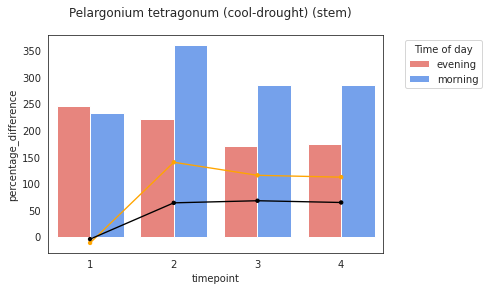

In [87]:
#P. tetragonium (stem) graph. plt = matplotlib, sns = seaborn packages
plt.figure() 
colors = {"morning": "#619CFF", "evening":  "#F8766D"}
sns.barplot(data=pelargonium_tet_stem_col, x="timepoint", y="average_FA", hue="time_of_day", palette = colors) #for barplots
sns.pointplot(data=pelargonium_tet_stem_point, x="timepoint", y="absolute_difference", color="orange", scale=0.5)
sns.pointplot(data=pelargonium_tet_stem_point, x="timepoint", y="percentage_difference", color="black", scale=0.5)
plt.legend(title="Time of day", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle(pelargonium_tet_stem_col['species_treatment'].unique()[0]) 
plt.savefig("graphs/Pelargonium/Pelargonium_Tetragonum_stem.png", bbox_inches='tight', facecolor='white') #face color specifies background color
 
